In [ ]:
from alexnet import *
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# Load a pre-trained AlexNet classifier from a path --> load=True
# or train AlexNet classifier and save the model to a path --> load=False
path = '../data/alexnet'
alex = AlexNet(path=path, load=False)

Epoch 1/5
907/907 [==============================] - 112s 120ms/step - loss: 0.5109 - accuracy: 0.8168 - val_loss: 0.1063 - val_accuracy: 0.9685
Epoch 2/5
907/907 [==============================] - 108s 120ms/step - loss: 0.0984 - accuracy: 0.9742 - val_loss: 0.0521 - val_accuracy: 0.9870
Epoch 3/5
907/907 [==============================] - 108s 119ms/step - loss: 0.0768 - accuracy: 0.9805 - val_loss: 0.0496 - val_accuracy: 0.9890
Epoch 4/5
907/907 [==============================] - 108s 119ms/step - loss: 0.0644 - accuracy: 0.9831 - val_loss: 0.0495 - val_accuracy: 0.9885
Epoch 5/5
907/907 [==============================] - 108s 119ms/step - loss: 0.0538 - accuracy: 0.9861 - val_loss: 0.0681 - val_accuracy: 0.9835
INFO:tensorflow:Assets written to: ../data/alexnet/assets


In [145]:
# Load dataset
_, (x_test, y_test) = datasets.mnist.load_data()

In [147]:
# Adversarial perturbation
###########################

# Definition of delta:
delta = np.load("report_perturbation_m15_T100.npy")
delta = np.tile(delta, 10000)
delta = delta.reshape(10000, 28, 28)

# Perturbed data with adversarial noise:
perturbed_data = x_test + delta
perturbed_data = np.clip(perturbed_data,0,1)

# Add 3 channels for AlexNet:
perturbed_data = tf.pad(perturbed_data, [[0, 0], [2, 2], [2, 2]])
perturbed_data = np.clip(perturbed_data,0,1)
perturbed_data = tf.expand_dims(perturbed_data, axis=3, name=None)
perturbed_data = tf.repeat(perturbed_data, 3, axis=3)

In [178]:
# Gaussian perturbation
########################

# Definition of the amount of noise:
noise = np.random.normal(0,0.3,784)
noise = np.tile(noise, 10000)
noise = noise.reshape(10000, 28, 28)

# Perturbed data with gaussian noise:
noise_data = x_test+noise
noise_data = np.clip(noise_data,0,1)

# Add 3 channels for AlexNet:
noise_data = tf.pad(noise_data, [[0, 0], [2, 2], [2, 2]])
noise_data = np.clip(noise_data,0,1)
noise_data = tf.expand_dims(noise_data, axis=3, name=None)
noise_data = tf.repeat(noise_data, 3, axis=3)

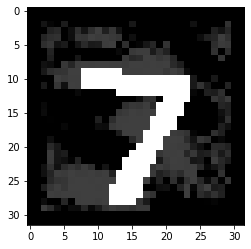

In [176]:
# Adversarial example
plt.imshow(perturbed_data[0], cmap='Greys')

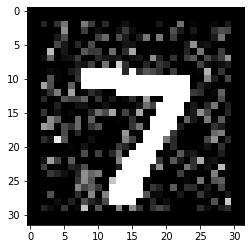

In [182]:
# Gaussian noise example
plt.imshow(noise_data[0], cmap='Greys')

In [19]:
# High accuracy on the original dataset
alex.model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 7s 23ms/step - loss: 0.0726 - accuracy: 0.9818


[0.07262216508388519, 0.9818000197410583]

In [177]:
# Very low accuracy on the Adversarial dataset
alex.model.evaluate(perturbed_data, y_test, verbose=1)

313/313 [==============================] - 7s 24ms/step - loss: 3.2369 - accuracy: 0.3295


[3.236900806427002, 0.3294999897480011]

In [183]:
# Quite acceptable accuracy on the Gaussian noise dataset
alex.model.evaluate(noise_data, y_test, verbose=1)

313/313 [==============================] - 8s 24ms/step - loss: 0.8424 - accuracy: 0.7373


[0.84243243932724, 0.7372999787330627]